<a href="https://colab.research.google.com/github/amritkant0008/Social-Information-Network/blob/main/Social%20Information%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [134]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [135]:
data  = pd.read_csv('https://raw.githubusercontent.com/Krish1095-projects/memes-classification/master/dataset/memegenerator.csv')

In [136]:
data.head()

,Meme ID,Archived URL,Base Meme Name,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text
0,10509464,http://webarchive.loc.gov/all/19960101000000-2...,Spiderman Approves,http://memegenerator.net/instance/10509464,5be4b65cc32d3a57be5b6693bb519155,24093.0,seems legit
1,12285257,http://webarchive.loc.gov/all/19960101000000-2...,Alright Then Business Kid,http://memegenerator.net/instance/12285257,e2eef6626b3fdb369df23a5fabd99df4,25513.0,Fret not I stayed at a Holiday Inn Express las...
2,20612245,http://webarchive.loc.gov/all/19960101000000-2...,Archer,http://memegenerator.net/instance/20612245,a6b7db4574325013f05bf1aabdcaeded,31157.0,"hello airplanes? yeah, this is blimps. Yeah, y..."
3,20614628,http://webarchive.loc.gov/all/19960101000000-2...,Futurama Fry,http://webarchive.loc.gov/all/0/http://memegen...,be75a0451f607d65df43813257d90f7a,50056.0,LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO...
4,24194267,http://webarchive.loc.gov/all/19960101000000-2...,One Does Not Simply,http://memegenerator.net/instance/24194267,2437b5ae9c4741c2e6f249f3f731dee2,24209.0,one does not simply put toothpaste back in th...


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57652 entries, 0 to 57651
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Meme ID               57652 non-null  object 
 1   Archived URL          57652 non-null  object 
 2   Base Meme Name        57645 non-null  object 
 3   Meme Page URL         57377 non-null  object 
 4   MD5 Hash              57644 non-null  object 
 5   File Size (In Bytes)  57644 non-null  float64
 6   Alternate Text        57347 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.1+ MB


In [138]:
data.isnull().sum()


Meme ID                   0
Archived URL              0
Base Meme Name            7
Meme Page URL           275
MD5 Hash                  8
File Size (In Bytes)      8
Alternate Text          305
dtype: int64

In [139]:
kk = data.drop(['Archived URL','Meme Page URL','MD5 Hash','File Size (In Bytes)'],axis=1)

In [140]:
kk.head()


,Meme ID,Base Meme Name,Alternate Text
0,10509464,Spiderman Approves,seems legit
1,12285257,Alright Then Business Kid,Fret not I stayed at a Holiday Inn Express las...
2,20612245,Archer,"hello airplanes? yeah, this is blimps. Yeah, y..."
3,20614628,Futurama Fry,LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO...
4,24194267,One Does Not Simply,one does not simply put toothpaste back in th...


In [141]:
kk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57652 entries, 0 to 57651
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Meme ID         57652 non-null  object
 1   Base Meme Name  57645 non-null  object
 2   Alternate Text  57347 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


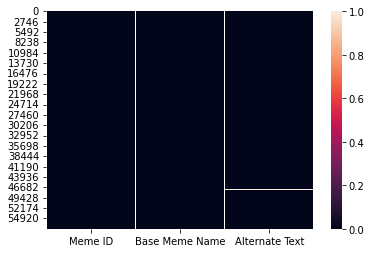

In [142]:
import seaborn as sb

sb.heatmap(kk.isnull(),cbar=True)
plt.show()

In [143]:
kk.isnull().sum()

Meme ID             0
Base Meme Name      7
Alternate Text    305
dtype: int64

In [144]:
kk.dropna(inplace=True)

In [145]:
kk.isnull().sum()

Meme ID           0
Base Meme Name    0
Alternate Text    0
dtype: int64

In [146]:
drop_data1 = kk[kk['Alternate Text'].str.isalnum() == True]
drop_data1.count()

Meme ID           814
Base Meme Name    814
Alternate Text    814
dtype: int64

In [147]:
kk = kk.drop(drop_data1.index)

In [148]:
# Dropping these wanted numeric values

kk = kk.drop([427,644,646,659,730,820,1270,1271,1553,2814,3765,3787,4342,5401,5970,6360,6429,6741,7571,8997,9932,10222,10708 \
             ,10916,11076,11271,11721,12020,12224,12544,12924,13175,13458,13490,13644,13645,14164,14708,14834,14895,14959,15125,15179,15187])

In [149]:
newdf= kk
newdf.count()

Meme ID           56483
Base Meme Name    56483
Alternate Text    56483
dtype: int64

In [150]:
newdf.head(10)

,Meme ID,Base Meme Name,Alternate Text
0,10509464,Spiderman Approves,seems legit
1,12285257,Alright Then Business Kid,Fret not I stayed at a Holiday Inn Express las...
2,20612245,Archer,"hello airplanes? yeah, this is blimps. Yeah, y..."
3,20614628,Futurama Fry,LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO...
4,24194267,One Does Not Simply,one does not simply put toothpaste back in th...
5,10178734,Insanity Wolf,Вступи в группу блядь
6,10178750,Butthurt Dweller,Тренажёрный зал
7,10178758,Philosoraptor,Если женя ашот то почему у него ник wonk
8,10178763,Butthurt Dweller,Тренажёрный зал не не не слышал
9,10178766,Foul Bachelor Frog,usar mal este meme que de todas maneras lo sub...


In [151]:
import nltk
from wordcloud import WordCloud

In [152]:
ll = " ".join(newdf['Alternate Text'].values)

In [153]:
word_cloud = WordCloud().generate(ll)

In [154]:
word_cloud = WordCloud(width=800,height=800,
                       background_color='white',
                       max_words=150).\
generate(ll)

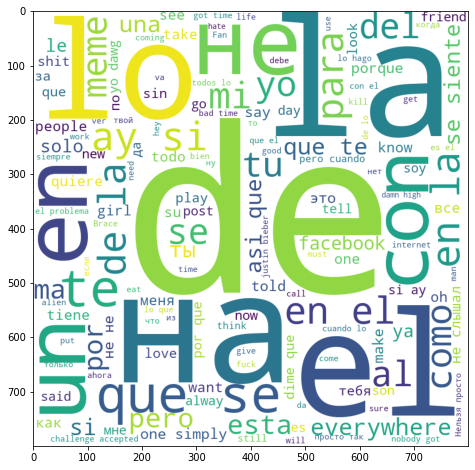

In [155]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [156]:
from tqdm import tqdm

In [157]:
from googletrans import Translator
translator = Translator(service_urls=[
      'translate.google.com',])

In [158]:
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [159]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [160]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [161]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [162]:
all_terms = word_tokenize(ll.lower())

In [163]:
stop_nltk = stopwords.words(['hungarian','swedish','kazakh','norwegian', \
                             'finnish','arabic','indonesian','portuguese','turkish', \
                            'azerbaijani','slovene','spanish','danish','nepali','romanian','greek',\
                            'dutch','tajik','german','english','russian','french','italian'])

In [164]:
stop_updated = stop_nltk + ["...","..","n't","got","memegenerator net","do not","get"]

In [165]:
kll = [term for term in all_terms \
if term not in stop_updated and term 
                    not in list(punctuation) and len(term)>2]

In [166]:
u =[]
k =[]
for i in kll:
  if i == "memegenerator net":
    u.append(i)
  else:
    k.append(i)

In [167]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not","n't":"not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","dont": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would", "got" : "get",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [168]:
# Regular expression for finding contractions
import re

contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

In [172]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [173]:
def clean_txt(sent):
    sk = []
    toks= []
    tokens = word_tokenize(sent.lower())
    for tks in tokens:
      if tks == "memegenerator net":
        sk.append(tks)
      else:
        toks.append(tks)
    lemmed = [lemm.lemmatize(term) for term in toks \
               if term not in stop_updated and \
                term not in list(punctuation) and len(term) > 2] 
    res = " ".join(lemmed)
    return res

In [174]:
newdf['clean_text'] = newdf['Alternate Text'].apply(clean_txt)

In [175]:
newdf.head(10)

,Meme ID,Base Meme Name,Alternate Text,clean_text
0,10509464,Spiderman Approves,seems legit,seems legit
1,12285257,Alright Then Business Kid,Fret not I stayed at a Holiday Inn Express las...,fret stayed holiday express last night
2,20612245,Archer,"hello airplanes? yeah, this is blimps. Yeah, y...",hello airplane yeah blimp yeah win
3,20614628,Futurama Fry,LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO...,leg cover hot leg cover cold leg right scared ...
4,24194267,One Does Not Simply,one does not simply put toothpaste back in th...,simply put toothpaste back tube
5,10178734,Insanity Wolf,Вступи в группу блядь,вступи группу блядь
6,10178750,Butthurt Dweller,Тренажёрный зал,тренажёрный зал
7,10178758,Philosoraptor,Если женя ашот то почему у него ник wonk,женя ашот почему ник wonk
8,10178763,Butthurt Dweller,Тренажёрный зал не не не слышал,тренажёрный зал слышал
9,10178766,Foul Bachelor Frog,usar mal este meme que de todas maneras lo sub...,usar mal meme toda maneras suban


In [176]:
bb = " ".join(newdf['clean_text'].values)
word_cloud = WordCloud(width=800,height=800,
                       background_color='black',
                       max_words=200).\
generate(bb)

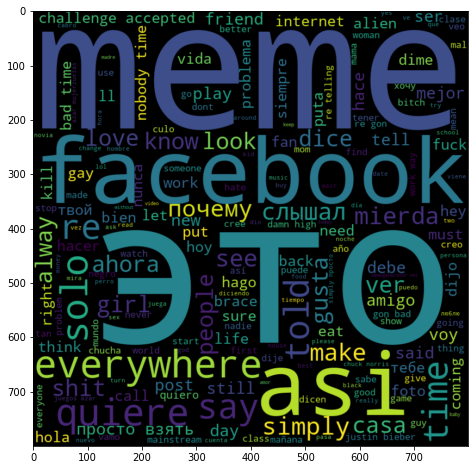

In [177]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

In [178]:
from sklearn.feature_extraction.text import CountVectorizer

unigram_count_vectorizer = CountVectorizer(max_features=2000)

Input_unigram = unigram_count_vectorizer.fit_transform(newdf['clean_text'])

DTM_unigram = pd.DataFrame(Input_unigram.toarray(),columns = unigram_count_vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [179]:
DTM_sum_uni = DTM_unigram.sum().sort_values(ascending=False)

In [180]:
temp2 = DTM_sum_uni.reset_index()
temp2.columns = ['clean_text','count']
temp2.head(5)

,clean_text,count
0,like,1163
1,time,803
2,это,744
3,re,714
4,meme,692


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


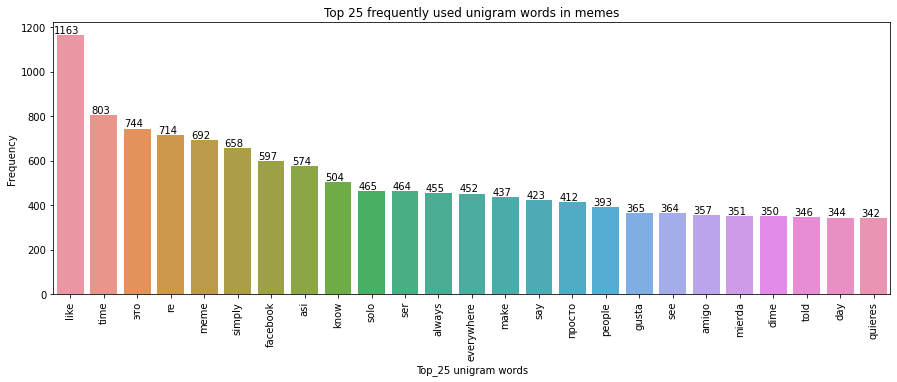

In [181]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.figure(figsize =(15,5))
plot = sb.barplot(DTM_sum_uni.head(25).index,DTM_sum_uni.head(25).values)
plt.xticks(rotation=90)
plt.xlabel('Top_25 unigram words')
plt.ylabel('Frequency')
plt.title('Top 25 frequently used unigram words in memes')

for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

plt.show()

In [182]:
from sklearn.feature_extraction.text import CountVectorizer

bigram_count_vectorizer = CountVectorizer(ngram_range=(2,2),max_features=200)

Input_bigram = bigram_count_vectorizer.fit_transform(newdf['clean_text'])

DTM_bigram = pd.DataFrame(Input_bigram.toarray(),columns = bigram_count_vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [183]:
DTM_bigram.head()

,000 000,aaand gone,achievement unlocked,aint nobody,alguien quiere,always drink,always use,amigo experto,aqui pondria,arrow knee,asi gusta,azar mujerzuelas,año nuevo,bad time,bender bending,bending rodriguez,berobat klinik,better drink,bien ctm,bitch love,bitch please,black people,blackjack hooker,buenas noticias,cada vez,cago leche,call duty,challenge accepted,challenge acepted,chaser john,chuck norris,clean water,confucius say,content images,counter strike,creare propio,dale gusta,dale like,damn high,dare double,...,steve job,telling people,terima kasih,tirate tirate,tong fang,usted weon,vale verga,valentine day,veo gente,ver porno,video game,vivo limite,voy hacer,watch badass,way good,wonka fan,work way,world kid,would like,yeah could,year old,вызов принят,гуф умер,день рождения,днем рождения,ебать люблю,каждый день,лес убегать,новый год,просишь друга,просто взять,работа лес,самом деле,скажу тебе,словно чумачечий,убегать нахуя,фатальный недостаток,хватит это,это стало,это терпеть
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [184]:
DTM_sum = DTM_bigram.sum().sort_values(ascending=False)

In [185]:
temp1 = DTM_sum.head(5).reset_index()
temp1.columns = ['clean_text','count']
temp1.head(5)

,clean_text,count
0,просто взять,254
1,challenge accepted,209
2,nobody time,178
3,bad time,170
4,justin bieber,161


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


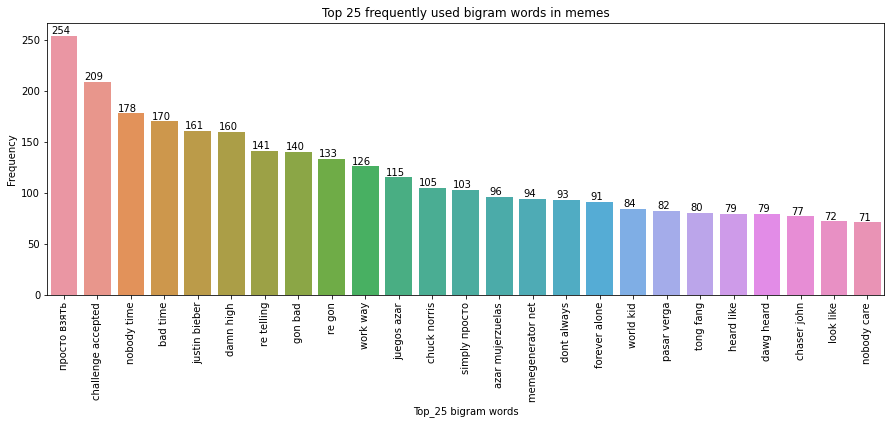

In [186]:
import matplotlib.pyplot as plt
import seaborn as sb

COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.figure(figsize =(15,5))
plot = sb.barplot(DTM_sum.head(25).index,DTM_sum.head(25).values)
plt.xticks(rotation=90)
plt.xlabel('Top_25 bigram words')
plt.ylabel('Frequency')
plt.title('Top 25 frequently used bigram words in memes')

for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

plt.show()

In [187]:
from sklearn.feature_extraction.text import CountVectorizer

trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=200)

Input_trigram= trigram_count_vectorizer.fit_transform(newdf['clean_text'])

DTM_trigram = pd.DataFrame(Input_trigram.toarray(),columns = trigram_count_vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [188]:
DTM_trigram.head()

,000 000 000,abuelita muerta desentierro,aint nobody time,alguien favor quiere,alguien puede pensar,alguien quiere pensar,always drink beer,always make meme,amigo experto mierda,azar mujerzuelas hecho,baile falto sida,bart quiero asustarte,base datos virus,bender bending rodriguez,bending rodriguez creare,berobat klinik tong,berobat klinik tongfang,better drink pee,binder full woman,bitch love symphony,bitch symphony bitch,botón derecho mouse,breathalyzer пойду молоком,buenas noticias amigo,cache images 80x80,cago leche merche,chile interesante dime,circulo sol wow,clic botón derecho,cod cod cod,content images languageflags,cool story bro,creare propio juego,culpa gobierno anterior,cumpleaños payaso plin,dare double dare,dark knight rise,datos virus sido,dawg dawg heard,dawg heard like,...,way good night,work way good,work way goodnight,world kid re,wrote bitch symphony,yum yum yum,белый пеле это,берём хамина отправляем,будь плохим парнем,всвсё тип топ,всё тип кирзачи,дай номер разберусь,делаешь это уважения,должны владеть оружием,жуткие головорезы солдаты,иду улице словно,камуфляж всвсё тип,кирзачи камуфляж всвсё,лес убегать нахуя,милан лавесси псж,ночной свете дня,обидел дай номер,пеле это черный,петь dub step,просто взять написать,просто взять перестать,просто взять пойти,просто взять поставить,просто взять сделать,работа лес убегать,руни белый пеле,скажу тебе можешь,тип кирзачи камуфляж,тип топ мир,топ мир наш,тьме ночной свете,улице словно чумачечий,хватит это терпеть,это стало мейнстримом,это черный расизм
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [189]:
DTM_sum_tri = DTM_trigram.sum().sort_values(ascending=False)

In [ ]:
{'postive':.02,negative:.3 , neutral.6 ,compound:.339}

In [192]:
temp2 =DTM_sum_tri.reset_index()
temp2.columns =['clean_text','count']
temp2.head()

,clean_text,count
0,gon bad time,139
1,re gon bad,116
2,simply просто взять,97
3,juegos azar mujerzuelas,94
4,dawg heard like,63


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


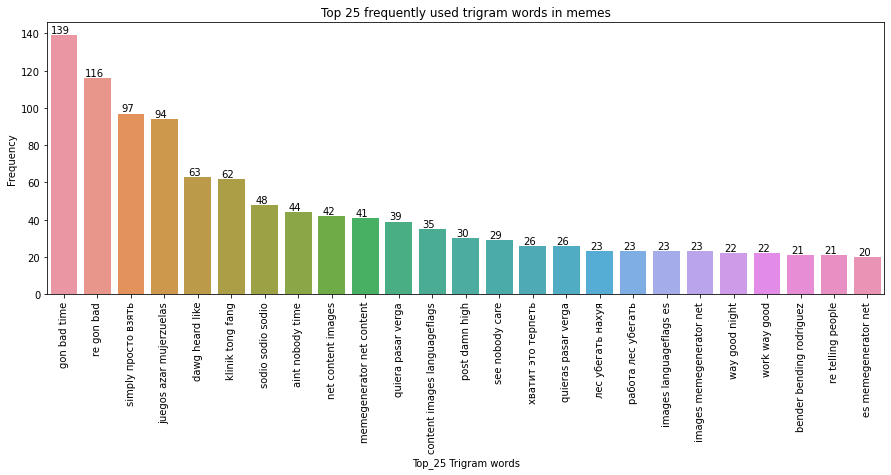

In [193]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.figure(figsize =(15,5))
plot = sb.barplot(DTM_sum_tri.head(25).index,DTM_sum_tri.head(25).values)
plt.xticks(rotation=90)
plt.xlabel('Top_25 Trigram words')
plt.ylabel('Frequency')
plt.title('Top 25 frequently used trigram words in memes')

for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

plt.show()

In [194]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score,confusion_matrix

In [195]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [196]:
analyser = SentimentIntensityAnalyzer()

def vader_class_prediction(score):
    
    sentiment_dict = analyser.polarity_scores(score) 
    
    if sentiment_dict['compound'] >= 0.01 : 
        vader_class = "Positive"
  
    elif sentiment_dict['compound'] <= - 0.01 : 
        vader_class = "Negative"
  
    else : 
        vader_class = "Neutral" 
    return vader_class
  

In [197]:
def get_vader_sentiment_score(text):
    return analyser.polarity_scores(text)['compound'] 

In [198]:
newdf['vader_score'] = newdf['Alternate Text'].apply(get_vader_sentiment_score)

In [199]:
newdf['prediction'] = newdf['Alternate Text'].apply(vader_class_prediction)

In [200]:
newdf.head(10)

,Meme ID,Base Meme Name,Alternate Text,clean_text,vader_score,prediction
0,10509464,Spiderman Approves,seems legit,seems legit,0.0000,Neutral
1,12285257,Alright Then Business Kid,Fret not I stayed at a Holiday Inn Express las...,fret stayed holiday express last night,-0.3089,Negative
2,20612245,Archer,"hello airplanes? yeah, this is blimps. Yeah, y...",hello airplane yeah blimp yeah win,0.8020,Positive
3,20614628,Futurama Fry,LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO...,leg cover hot leg cover cold leg right scared ...,-0.4404,Negative
4,24194267,One Does Not Simply,one does not simply put toothpaste back in th...,simply put toothpaste back tube,0.0000,Neutral
5,10178734,Insanity Wolf,Вступи в группу блядь,вступи группу блядь,0.0000,Neutral
6,10178750,Butthurt Dweller,Тренажёрный зал,тренажёрный зал,0.0000,Neutral
7,10178758,Philosoraptor,Если женя ашот то почему у него ник wonk,женя ашот почему ник wonk,0.0000,Neutral
8,10178763,Butthurt Dweller,Тренажёрный зал не не не слышал,тренажёрный зал слышал,0.0000,Neutral
9,10178766,Foul Bachelor Frog,usar mal este meme que de todas maneras lo sub...,usar mal meme toda maneras suban,0.0000,Neutral


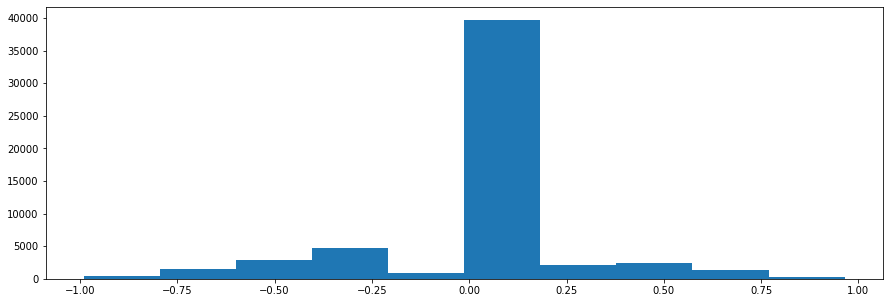

In [201]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.figure(figsize =(15,5))
plot = plt.hist(newdf['vader_score'])

plt.show()

In [202]:
c_data = newdf.prediction.value_counts()

In [203]:
c_data1 = c_data.reset_index()
c_data1.columns = ['predicted classes', 'count']
c_data1

,predicted classes,count
0,Neutral,38897
1,Negative,10437
2,Positive,7149


<Figure size 720x504 with 0 Axes>

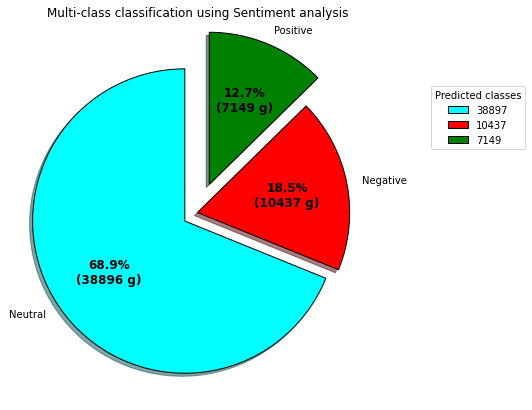

In [204]:
fig = plt.figure(figsize =(10, 7)) 

explode = (0.1, 0.0, 0.2) 

colors = ( "cyan", "red", "green")

wp = { 'linewidth' : 1, 'edgecolor' : "black" }

def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(c_data,  
                                  autopct = lambda pct: func(pct, c_data), 
                                  explode = explode,  
                                  labels = c_data.index, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
ax.legend(wedges, c_data, 
          title ="Predicted classes", 
          loc ="center left", 
          bbox_to_anchor =(1.1, 0, 0.5, 1.5)) 
  
plt.setp(autotexts, size = 12, weight ="bold") 
ax.set_title("Multi-class classification using Sentiment analysis") 

plt.show()

In [205]:
from sklearn.preprocessing import LabelEncoder

x1 = LabelEncoder()
newdf['encoded_classes'] = x1.fit_transform(newdf['prediction']) 
newdf.head(10)

,Meme ID,Base Meme Name,Alternate Text,clean_text,vader_score,prediction,encoded_classes
0,10509464,Spiderman Approves,seems legit,seems legit,0.0000,Neutral,1
1,12285257,Alright Then Business Kid,Fret not I stayed at a Holiday Inn Express las...,fret stayed holiday express last night,-0.3089,Negative,0
2,20612245,Archer,"hello airplanes? yeah, this is blimps. Yeah, y...",hello airplane yeah blimp yeah win,0.8020,Positive,2
3,20614628,Futurama Fry,LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO...,leg cover hot leg cover cold leg right scared ...,-0.4404,Negative,0
4,24194267,One Does Not Simply,one does not simply put toothpaste back in th...,simply put toothpaste back tube,0.0000,Neutral,1
5,10178734,Insanity Wolf,Вступи в группу блядь,вступи группу блядь,0.0000,Neutral,1
6,10178750,Butthurt Dweller,Тренажёрный зал,тренажёрный зал,0.0000,Neutral,1
7,10178758,Philosoraptor,Если женя ашот то почему у него ник wonk,женя ашот почему ник wonk,0.0000,Neutral,1
8,10178763,Butthurt Dweller,Тренажёрный зал не не не слышал,тренажёрный зал слышал,0.0000,Neutral,1
9,10178766,Foul Bachelor Frog,usar mal este meme que de todas maneras lo sub...,usar mal meme toda maneras suban,0.0000,Neutral,1
